# Introduction to Data Visualization with matplotlib

In [1]:
# Setup header
import calendar
import matplotlib.pyplot as plt
import pandas as pd

austin_weather = pd.read_csv('austin_weather.csv')
seattle_weather = pd.read_csv('seattle_weather.csv')

austin_weather['MONTH'] = austin_weather['DATE'].map(lambda x: calendar.month_abbr[x])
seattle_weather['MONTH'] = seattle_weather['DATE'].map(lambda x: calendar.month_abbr[x])
seattle_weather = seattle_weather[seattle_weather['NAME'] == 'SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US']

## Introduction to matplotlib

### Using the `matplotlib.pyplot` interface

The lesson starts off with a sort of "hello world" with a blank plot:

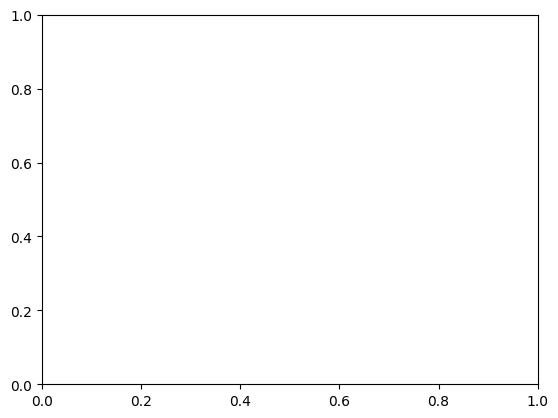

In [2]:
fig, ax = plt.subplots()

The lesson then advances fairly quickly by showing us how to plot two line plots in the same figure:

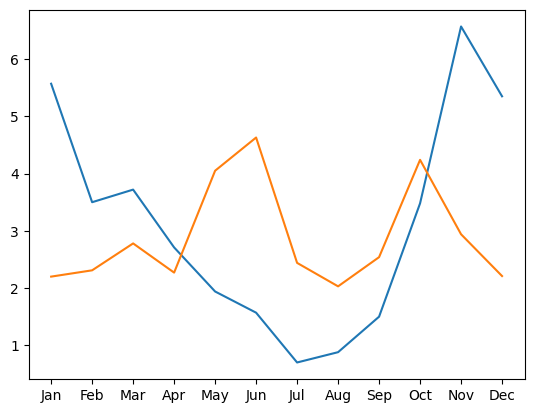

In [3]:
fig, ax = plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

### Customizing data appearance

Here several aesthetic settings are altered to make it clear the line plots observe changes from one month to the next (as opposed to being continous) and ensure the distinctiveness of the two plots:

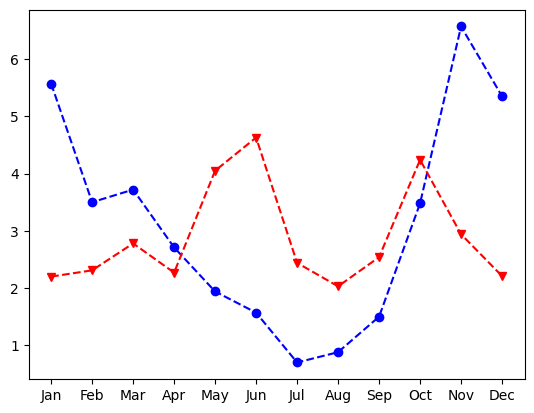

In [4]:
fig, ax = plt.subplots()
ax.plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'], color='b', marker='o', linestyle='--')
ax.plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'], color='r', marker='v', linestyle='--')

### Creating a grid of subplots

Here's how to create three rows and two columns worth of empty plots to be filled in later:

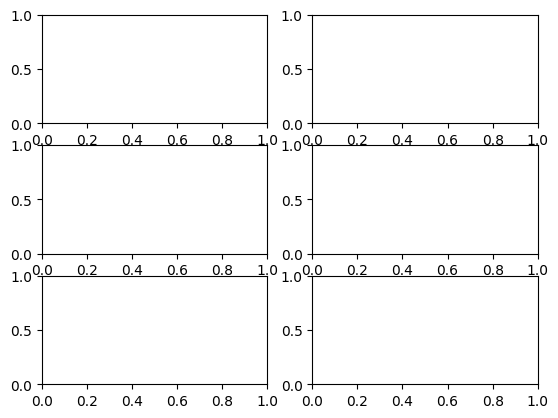

In [5]:
fig, ax = plt.subplots(3, 2)

### Creating small multiples with plt.subplots

Here are some (unlabeled) plots depicting monthly precepitation and average temperature in Seattle and Austin respectively:

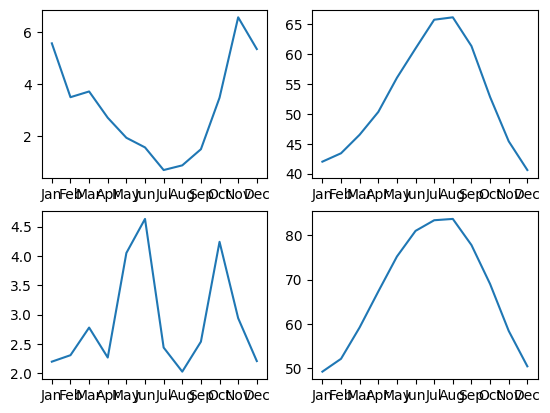

In [6]:
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])

### Small multiples with shared y-axis

Here are two more (unlabeled) plots of the average monthly precipitation in Seattle and Austin, respectively, with dashed lines for the 25th and 75th percentiles above and below and a shared y-axis through `sharey=True` to make sure of apples-to-apples-comparisons:

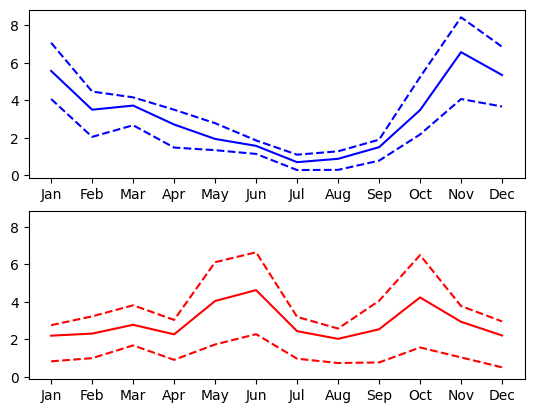

In [7]:
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation in the top axes
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color='b')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color='b', linestyle='--')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color='b', linestyle='--')

# Plot Austin precipitation in the bottom axes
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color='r')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"], color='r', linestyle='--')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"], color='r', linestyle='--')